# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize

from statsmodels.graphics.gofplots import qqplot



figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
athletes.shape

(11538, 11)

In [6]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
height_sample_3000 = get_sample(df=athletes, col_name='height', n=3000)

In [8]:
def check_normality(statistic, p_value, alpha=0.05):
    print('Statistics=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value <= alpha:
        seems_normal = False
        print('Sample does not look Gaussian (reject H0)')
    else:
        seems_normal = True
        print('Sample looks Gaussian (fail to reject H0)')
    return seems_normal
    

In [9]:
def q1():
    statistic, p_value = sct.shapiro(height_sample_3000)
    print("Shapiro-Wilk Normality Test")
    return check_normality(statistic, p_value)

In [10]:
# Test
q1()

Shapiro-Wilk Normality Test
Statistics=0.996, p_value=0.000
Sample does not look Gaussian (reject H0)


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [11]:
def plot_dist_qq_box(variable_to_plot, fit_legend='normal_fit'):
    fig, axes = plt.subplots(2, 2)
    l1 = sns.distplot(variable_to_plot, fit=sct.norm, kde=False, ax=axes[0,0])
    l2= sns.boxplot(variable_to_plot, orient='v' , ax=axes[0,1])
    l3 = qqplot(variable_to_plot, line='s', ax=axes[1,0])
    l4 = sns.distplot(variable_to_plot, fit=sct.norm,  hist=False, kde_kws={"shade": True}, ax=axes[1,1])
    axes[0,0].legend((fit_legend,'distribution'))
    axes[1,0].legend(('distribution',fit_legend))
    axes[1,1].legend((fit_legend,'kde_gaussian'));

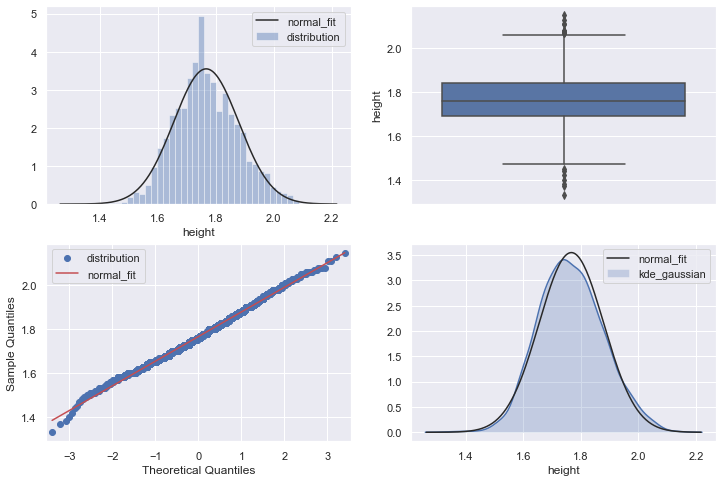

In [12]:
plot_dist_qq_box(height_sample_3000)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
def q2():
    statistic, p_value = sct.jarque_bera(height_sample_3000)
    print("Jarque-Bera Normality Test")
    return check_normality(statistic, p_value)


In [14]:
#Test
q2()

Jarque-Bera Normality Test
Statistics=13.034, p_value=0.001
Sample does not look Gaussian (reject H0)


False

In [15]:
def anderson_darling_normality_test(result):
    
    print('Statistic: %.3f' % result.statistic)
    p = 0
    is_normal = True
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            is_normal = False
    plt.scatter(result.significance_level,result.critical_values)
    plt.xlabel('Significance Level')
    plt.ylabel('Critical Values')
    plt.title("Anderson-Darling Normality Test")
    
    return is_normal


In [18]:
def print_check_normality_multiple_tests(data):
       
    # Shapiro-Wilk
    print("Shapiro-Wilk Normality Test")
    statistic, p_value = sct.shapiro(data)
    is_normal_shapiro_wilk = check_normality(statistic, p_value)
    
    # Jarque-Bera
    print("\nJarque-Bera Normality Test")
    statistic, p_value = sct.jarque_bera(data)
    is_normal_jarque_bera = check_normality(statistic, p_value)
    
    # D'Agostino-Pearson or D'Agostino K^2
    # check skew: pushed left or right (asymmetry)
    # check kurtosis: how much is in the tail
    print("\nD'Agostino-Pearson Normality Test")
    statistic, p_value = sct.normaltest(data)
    check_normality(statistic, p_value)
    is_normal_dagostino_pearson = check_normality(statistic, p_value)
    
    # Anderson-Darling    
    print("\nAnderson-Darling Normality Test")
    result = sct.anderson(data, dist='norm')
    anderson_darling_normality_test(result)
    is_normal_anderson_darling = check_normality(statistic, p_value)
    
    is_normal = {"Method": ["Shapiro-Wilk", "Jarque-Bera", "D'Agostino-Pearson", "Anderson-Darling"],
                 'Is_Normal': [is_normal_shapiro_wilk, is_normal_jarque_bera,
                               is_normal_dagostino_pearson, is_normal_anderson_darling]
                }
    
    return pd.DataFrame(data=is_normal)
    
    

__Para refletir__:

* Esse resultado faz sentido?

Shapiro-Wilk Normality Test
Statistics=0.996, p_value=0.000
Sample does not look Gaussian (reject H0)

Jarque-Bera Normality Test
Statistics=13.034, p_value=0.001
Sample does not look Gaussian (reject H0)

D'Agostino-Pearson Normality Test
Statistics=12.886, p_value=0.002
Sample does not look Gaussian (reject H0)
Statistics=12.886, p_value=0.002
Sample does not look Gaussian (reject H0)

Anderson-Darling Normality Test
Statistic: 3.761
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistics=12.886, p_value=0.002
Sample does not look Gaussian (reject H0)


,Method,Is_Normal
0,Shapiro-Wilk,False
1,Jarque-Bera,False
2,D'Agostino-Pearson,False
3,Anderson-Darling,False


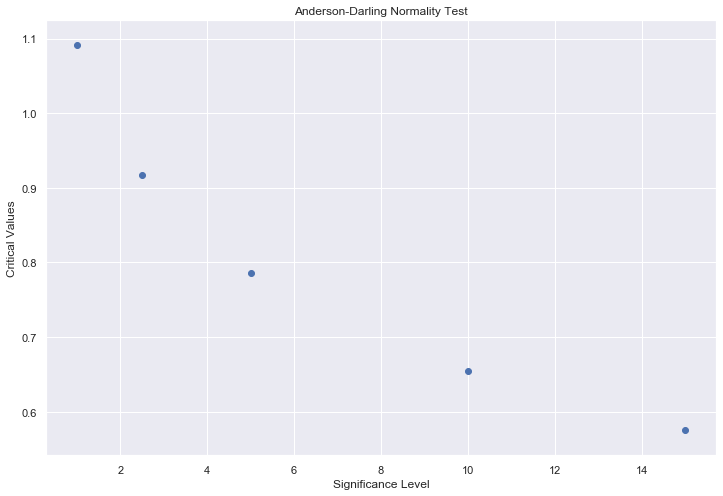

In [20]:
print_check_normality_multiple_tests(height_sample_3000)

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [21]:
weight_sample_3000 = get_sample(df=athletes, col_name='weight', n=3000)

In [22]:
def q3():
    statistic, p_value = sct.normaltest(weight_sample_3000)
    print("D'Agostino-Pearson Normality Test")
    return check_normality(statistic, p_value)

In [23]:
#Test
q3()

D'Agostino-Pearson Normality Test
Statistics=510.247, p_value=0.000
Sample does not look Gaussian (reject H0)


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

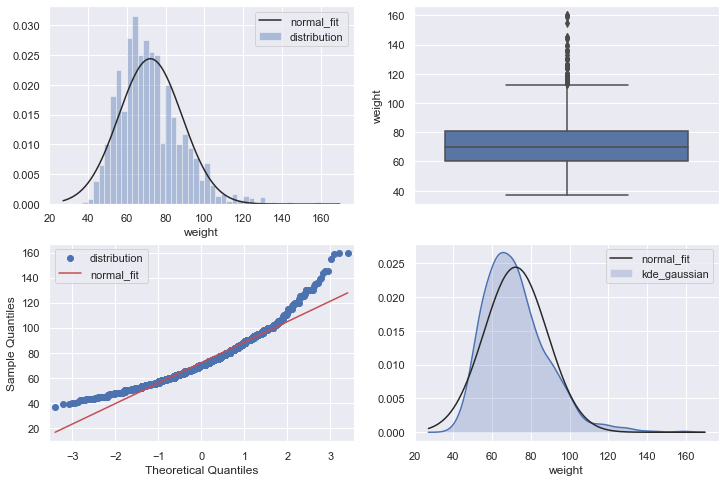

In [24]:
plot_dist_qq_box(weight_sample_3000)

Shapiro-Wilk Normality Test
Statistics=0.948, p_value=0.000
Sample does not look Gaussian (reject H0)

Jarque-Bera Normality Test
Statistics=993.796, p_value=0.000
Sample does not look Gaussian (reject H0)

D'Agostino-Pearson Normality Test
Statistics=510.247, p_value=0.000
Sample does not look Gaussian (reject H0)
Statistics=510.247, p_value=0.000
Sample does not look Gaussian (reject H0)

Anderson-Darling Normality Test
Statistic: 29.976
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistics=510.247, p_value=0.000
Sample does not look Gaussian (reject H0)


,Method,Is_Normal
0,Shapiro-Wilk,False
1,Jarque-Bera,False
2,D'Agostino-Pearson,False
3,Anderson-Darling,False


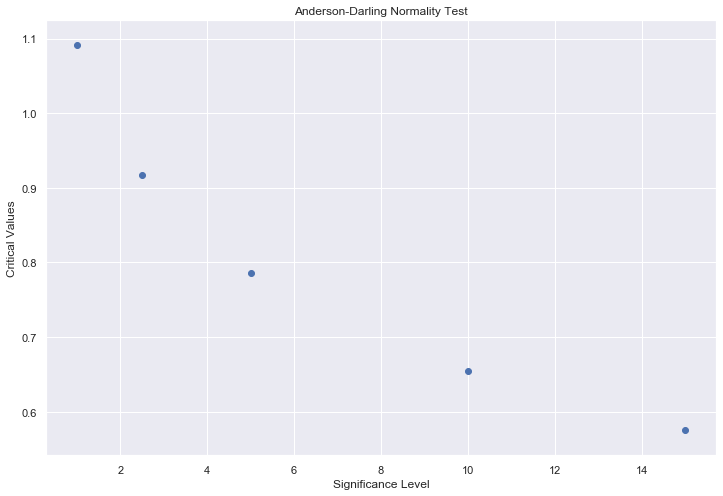

In [25]:
print_check_normality_multiple_tests(weight_sample_3000)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [26]:
log_weight_sample_3000 = np.log(weight_sample_3000)

In [27]:
def q4():
    statistic, p_value = sct.normaltest(log_weight_sample_3000)
    print("D'Agostino-Pearson Log-Normality Test")
    return check_normality(statistic, p_value)

In [28]:
#test
q4()

D'Agostino-Pearson Log-Normality Test
Statistics=45.915, p_value=0.000
Sample does not look Gaussian (reject H0)


False

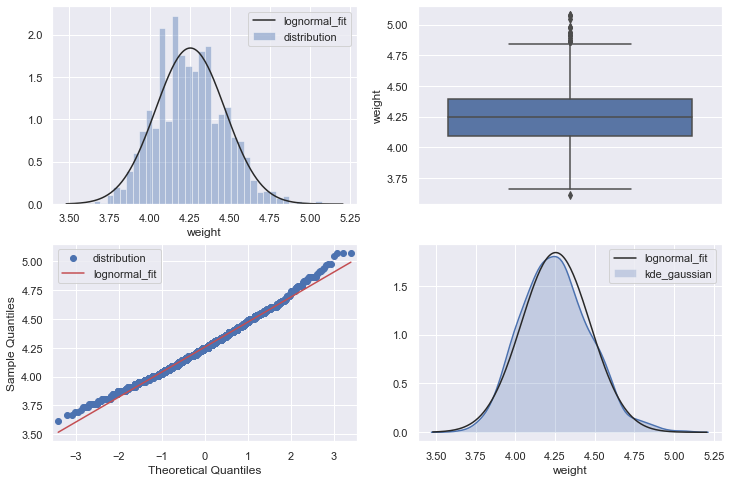

In [29]:
plot_dist_qq_box(log_weight_sample_3000, fit_legend='lognormal_fit')

IMPORTANT NOTE:
Since your sample was transformed to log
Interpret normal as LOGnormal and normality as LOG-Normality 

Shapiro-Wilk Normality Test
Statistics=0.994, p_value=0.000
Sample does not look Gaussian (reject H0)

Jarque-Bera Normality Test
Statistics=47.650, p_value=0.000
Sample does not look Gaussian (reject H0)

D'Agostino-Pearson Normality Test
Statistics=45.915, p_value=0.000
Sample does not look Gaussian (reject H0)
Statistics=45.915, p_value=0.000
Sample does not look Gaussian (reject H0)

Anderson-Darling Normality Test
Statistic: 3.922
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistics=45.915, p_value=0.000
Sample does not look Gaussian (reject H0)


,Method,Is_Normal
0,Shapiro-Wilk,False
1,Jarque-Bera,False
2,D'Agostino-Pearson,False
3,Anderson-Darling,False


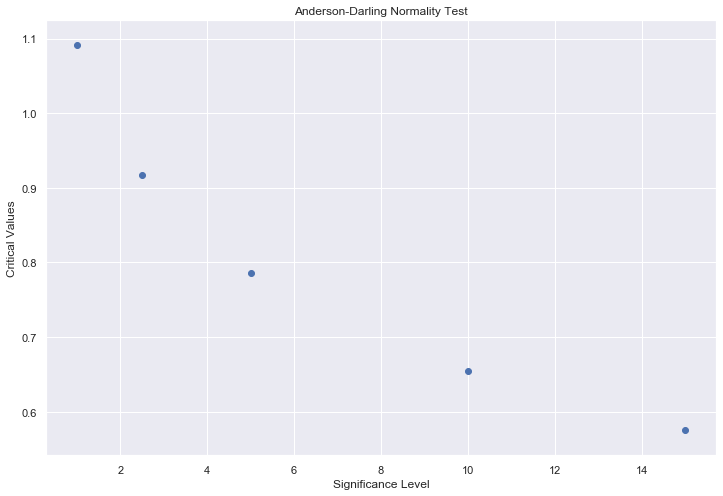

In [30]:
print("IMPORTANT NOTE:")
print("Since your sample was transformed to log")
print("Interpret normal as LOGnormal and normality as LOG-Normality \n")
print_check_normality_multiple_tests(log_weight_sample_3000)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [31]:
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [32]:
athletes['nationality'].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
CHN    404
GBR    374
JPN    346
CAN    321
ESP    313
ITA    312
RUS    286
NED    249
POL    242
ARG    223
KOR    213
NZL    208
UKR    205
SWE    164
HUN    154
COL    154
RSA    146
DEN    128
MEX    126
BLR    124
IND    123
CUB    123
EGY    122
BEL    108
SUI    104
      ... 
VIN      4
IVB      4
COD      4
VAN      4
COM      4
OMA      4
SLE      4
GAM      4
ASA      4
YEM      3
AFG      3
LIE      3
BIZ      3
BRU      3
TLS      3
SSD      3
KIR      3
MON      3
SOL      3
STP      3
BHU      2
LBR      2
GEQ      2
NRU      2
DMA      2
MTN      2
SWZ      2
CHA      2
SOM      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [33]:
bra = athletes.loc[athletes['nationality']=='BRA']
bra.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
79,236523132,Adam Imer,BRA,male,8/18/89,1.82,88.0,hockey,0,0,0
106,993710181,Adenizia da Silva,BRA,female,12/18/86,1.87,65.0,volleyball,0,0,0
109,930618704,Adilson da Silva,BRA,male,1/24/72,1.70,79.0,golf,0,0,0
114,787208883,Adrian Baches,BRA,male,4/7/90,1.84,83.0,aquatics,0,0,0
128,80367651,Adriana Aparecida da Silva,BRA,female,7/22/81,1.66,52.0,athletics,0,0,0


## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [34]:
# bra = athletes.loc[athletes['nationality']=='BRA']
usa = athletes.loc[athletes['nationality']=='USA']
can = athletes.loc[athletes['nationality']=='CAN']

In [35]:
def check_equal_means(statistic, p_value, alpha=0.05):
    print('Statistics=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value <= alpha/2:
        means_seems_equal = False
        print('Sample means not look equal (reject H0)')
    else:
        means_seems_equal = True
        print('Sample means look equal (fail to reject H0)')
    return means_seems_equal

In [36]:
def q5():
    statistic, p_value = sct.ttest_ind(bra['height'].dropna(), usa['height'].dropna(), equal_var=False)
    return check_equal_means(statistic, p_value)

In [37]:
# Teste
q5()

Statistics=-3.223, p_value=0.001
Sample means not look equal (reject H0)


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [38]:
def q6():
    statistic, p_value = sct.ttest_ind(bra['height'].dropna(), can['height'].dropna(), equal_var=False)
    return check_equal_means(statistic, p_value)

In [39]:
# Teste
q6()

Statistics=0.639, p_value=0.523
Sample means look equal (fail to reject H0)


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [40]:
def q7():
    statistic, p_value = sct.ttest_ind(usa['height'].dropna(), can['height'].dropna(), equal_var=False)
    check_equal_means(statistic, p_value)
    return p_value.round(8)

In [41]:
# Teste
q7()

Statistics=3.517, p_value=0.000
Sample means not look equal (reject H0)


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

count    476.000000
mean       1.764034
std        0.117388
min        1.330000
25%        1.680000
50%        1.755000
75%        1.840000
max        2.110000
Name: height, dtype: float64

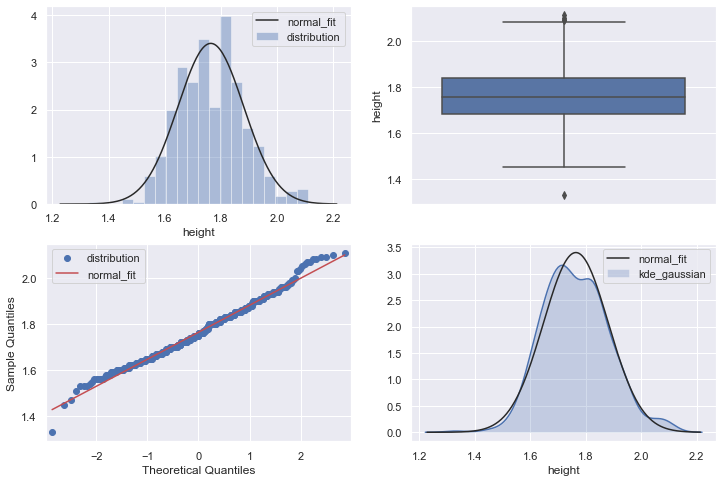

In [51]:
plot_dist_qq_box(bra['height'].dropna())


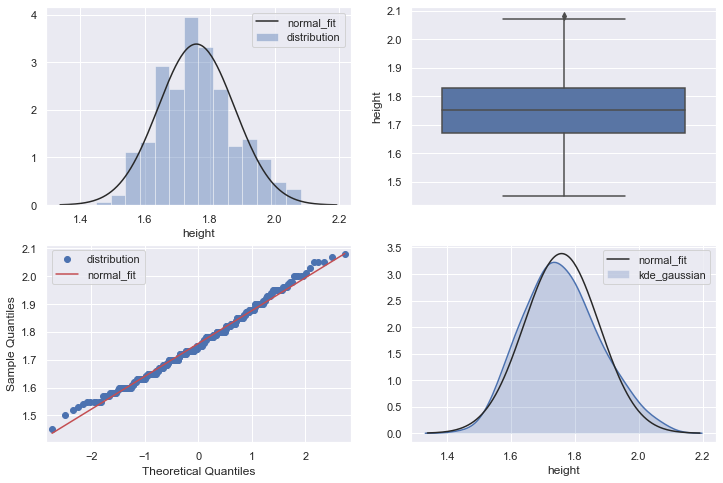

In [49]:
plot_dist_qq_box(can['height'].dropna())

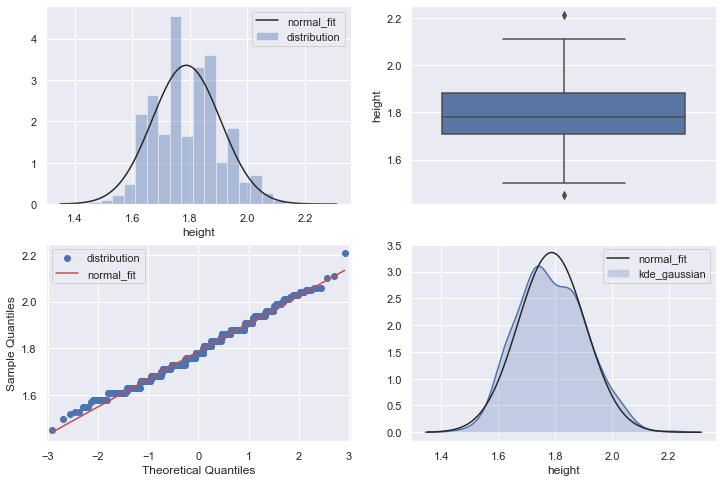

In [48]:
plot_dist_qq_box(usa['height'].dropna())

In [62]:
df = pd.DataFrame([bra['height'].dropna().describe(),
              can['height'].dropna().describe(),
              usa['height'].dropna().describe()]).T
df.columns = ["BRA", "CAN", "USA"]
df.round(3)

,BRA,CAN,USA
count,476.000,320.000,560.000
mean,1.764,1.759,1.788
std,0.117,0.118,0.119
min,1.330,1.450,1.450
25%,1.680,1.670,1.710
50%,1.755,1.750,1.780
75%,1.840,1.830,1.880
max,2.110,2.080,2.210


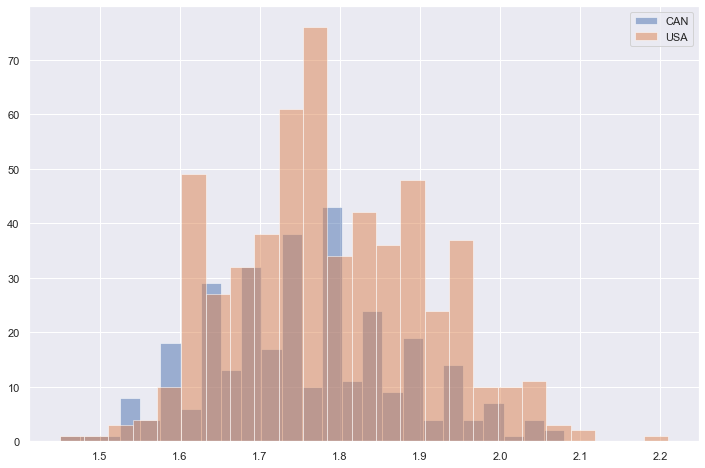

In [77]:
plt.hist(can['height'].dropna(), bins=25, alpha=0.5, label='CAN')
plt.hist(usa['height'].dropna(), bins=25, alpha=0.5, label='USA')
plt.legend(loc='upper right')
plt.show()

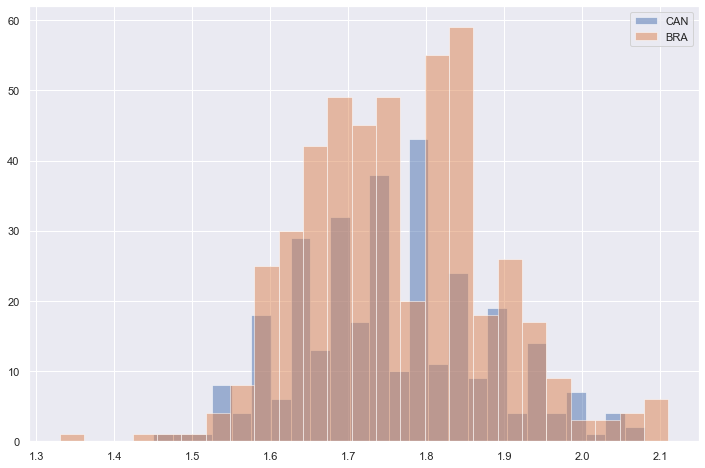

In [78]:
plt.hist(can['height'].dropna(), bins=25, alpha=0.5, label='CAN')
plt.hist(bra['height'].dropna(), bins=25, alpha=0.5, label='BRA')
plt.legend(loc='upper right')
plt.show()

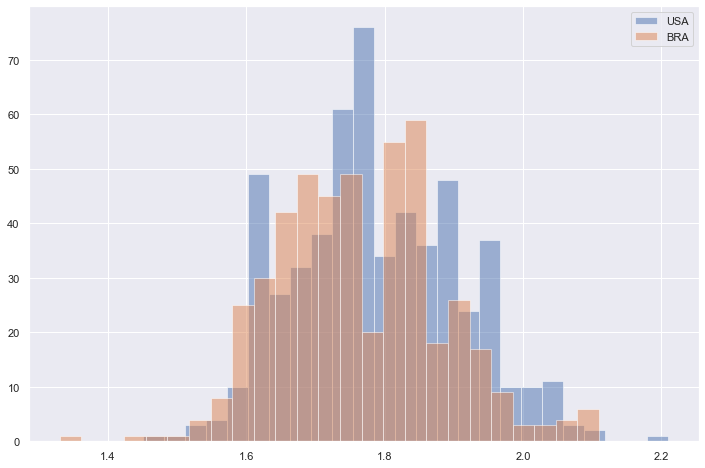

In [79]:
plt.hist(usa['height'].dropna(), bins=25, alpha=0.5, label='USA')
plt.hist(bra['height'].dropna(), bins=25, alpha=0.5, label='BRA')
plt.legend(loc='upper right')
plt.show()

In [81]:
#!pip install geopandas

  Using cached geopandas-0.8.0-py2.py3-none-any.whl (962 kB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\fuck\pycharmprojects\codenation\venv\scripts\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Fuck\\AppData\\Local\\Temp\\pip-install-4z0vltk4\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Fuck\\AppData\\Local\\Temp\\pip-install-4z0vltk4\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Fuck\AppData\Local\Temp\pip-pip-egg-info-_530imou'
         cwd: C:\Users\Fuck\AppData\Local\Temp\pip-install-4z0vltk4\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the 

In [82]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ModuleNotFoundError: No module named 'geopandas'